## Exercise 1
* **Dataset:** `Iris`
* **Model to use:** [`KNN`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* **Model evaluation:** try the [classification report](http://www.thedatalife.com/classification-report-python/)

The Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. 

You can load the dataset with `scikit-learn` by using: 

```python
sklearn.datasets.load_iris()
```

Your mission it to apply KNN to this dataset and find the best K.

You will quickly understand that you can't evaluate a complexe classification model just with a percentage of accuracy. 

To understand how accurate your model is and, more importantly, where it is wrong, use scikit learn's [classification report](http://www.thedatalife.com/classification-report-python/).

To use it properly, you will need to understand what the following terms are:
* `Recall`
* `Precision`
* `F1-score`
* `Support`

You can make your own research or [read this article](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/).

# Drills in Classification
Without practice, you cannot claim that you know things and these drills here are there to enable this option for you. Are you ready to classify some very interesting data? 


In [99]:
# Import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [100]:
# Load you dataset
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

#iris_df.describe()
X= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
iris_df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [102]:
# Explore the dataset to understand it. (use pandas and your data visualation's favorite library)
#find null values in the dataset
print(iris_df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [103]:
#y = iris_df["target"].values
#x = iris_df.drop(["target"], axis = 1)

C:\Users\Mate Kovacs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


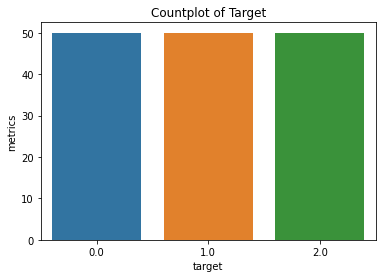

In [104]:

#2. distribution of target variable.
sns.countplot(y)

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('metrics')
plt.show()

In [105]:
# Use a KNN model
#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(X)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test


In [106]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [107]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 97.77777777777777 and k = [11, 12, 13, 14, 15, 17]


In [108]:
# Evaluate your model
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.9333333333333333

In [109]:
# To evaluate whether this model is a ‘good’ model or not, we use "confusion matrix"
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0.0,1.0,2.0,All
Actual,,,,
0.0,17,0,0,17
1.0,0,11,1,12
2.0,0,2,14,16
All,17,13,15,45
